<a href="https://colab.research.google.com/github/diegomendes1/PSO-Pixels/blob/main/PSO-Pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Diego Mendes da Silva

Computação Natural - Prof. Carmelo Filho

**Particle Swarm Optimization: Pixels Claros em Imagem**

OBS: Topologia Local

Parâmetros do PSO

In [ ]:
modo = 0 #0 para buscar pixel claro, 1 para buscar pixel escuro
numIteracoes = 100
alvoErro = 1e-2 # 1% de erro, serão aceito valores abaixo de 2,55 ou acima de 252,45
numParticulas = 10

w = 0.5
c1 = 0.8
c2 = 0.9

Imports

In [ ]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image
import pandas as pd
import numpy as np
import random
%matplotlib inline

# Carregando a imagem

In [ ]:
image = Image.open('img.jpeg')
data = asarray(image)
imgHeight = data.shape[0]
imgWidth = data.shape[1]

# Convertendo em Array

In [ ]:
matrizPixels = np.zeros((imgHeight,imgWidth))
for i in range(imgHeight):
  for j in range(imgWidth):
    matrizPixels[i][j] = data[i][j][0]

def getValor(pos):
  return matrizPixels[(int)(pos[1])][(int)(pos[0])]

# PSO

In [ ]:
#Particula
class Particula():
  def __init__(self, neighbor):
    self.posAtual = np.array([(int)(random.random()*imgWidth),(int)(random.random()*imgHeight)])
    self.pBestPos = self.posAtual
    self.pBestValor = -1
    self.vel = np.array([0,0])
    self.neighbor = neighbor

  def mover(self):
    self.posAtual = self.posAtual + self.vel
    x = self.posAtual[0]
    y = self.posAtual[1]

    #Verificando os limites da imagem
    if x >= imgWidth: x = imgWidth-1
    elif x < 0: x = 0

    if y >= imgHeight: y = imgHeight-1
    elif x < 0: y = 0

    self.posAtual = np.array([x, y])

In [ ]:
class Ambiente():
  def __init__(self, modo, alvoErro, numParticulas):
    self.modo = modo
    self.alvoErro = alvoErro
    self.numParticulas = numParticulas
    self.particulas = []
    self.gBestPos = np.array([(int)(random.random()*imgWidth),(int)(random.random()*imgHeight)])
    self.gBestValor = -1

  def fitness(self, p):
    v = getValor(p.posAtual)/255
    if modo == 0: return v 
    else: return 1 - v

  def calcularpBest(self):
    for p in self.particulas:
      temp = self.fitness(p)
      if temp > p.pBestValor:
        p.pBestValor = temp
        p.pBestPos = p.posAtual

  def calculargBest(self):
    for p in self.particulas:
      temp = self.fitness(p)
      if temp > self.gBestValor:
        self.gBestValor = temp
        self.gBestPos = p.posAtual

  def movimentarParticulas(self):
    for p in self.particulas:
      novaVel = (w*p.vel) + c1*random.random() *(p.pBestPos - p.posAtual) + c2*random.random() * (p.neighbor.pBestPos - p.posAtual)
      p.vel = novaVel.astype(int)
      p.mover()

In [ ]:
fitnessArray = []
valorArray = []

In [ ]:
particulas = [Particula(None) for _ in range(numParticulas)]
for i in range(1, len(particulas)):
  particulas[i].neighbor = particulas[i-1]

particulas[0].neighbor = particulas[len(particulas)-1]

ambiente = Ambiente(modo, alvoErro, numParticulas)
ambiente.particulas = particulas

i = 0
while i < numIteracoes:
  ambiente.calcularpBest()
  ambiente.calculargBest()
  fitnessArray.append(ambiente.gBestValor)
  valorArray.append(getValor(ambiente.gBestPos))

  if abs(1-(ambiente.gBestValor)) <= ambiente.alvoErro: break

  ambiente.movimentarParticulas()
  i += 1

# Resultados

In [ ]:
print("Número de Iterações: " + str(i))
cor = "claro" if modo == 0 else "escuro"
print("Posição do pixel mais " + cor + ": " + str(ambiente.gBestPos))
print("valor mais " + cor + " encontrado: " + str(getValor(ambiente.gBestPos)))
print("Sendo 0 o mais escuro, e 255 o mais claro possível.")

Número de Iterações: 12
Posição do pixel mais claro: [1786  362]
valor mais claro encontrado: 255.0
Sendo 0 o mais escuro, e 255 o mais claro possível.


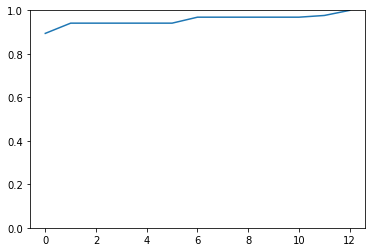

In [ ]:
#O gráfico mostra a evolução do fitness em cada iteração
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(0,1)
ax.plot(np.arange(len(fitnessArray)), fitnessArray);